# Treinamento Customizado | YOLO



In [4]:
pip install ultralytics

  Using cached ultralytics-8.3.153-py3-none-any.whl.metadata (37 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached torchvision-0.22.1-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached ultralytics-8.3.153-py3-none-any.whl (1.0 MB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached torchvision-0.22.1-cp312-cp312-win_amd64.whl (1.7 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO

# Definindo e baixando modelo
model = YOLO("yolov8n.pt")

WARNING Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\felip\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 8.45MB/s]


In [6]:
import os
import random
import shutil

# Definir caminhos
image_dir = "Images"
label_dir = "Annotations"

train_img_dir = "dataset/images/train"
val_img_dir = "dataset/images/val"
train_label_dir = "dataset/labels/train"
val_label_dir = "dataset/labels/val"

# Criar diretórios caso não existam
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Listar todas as imagens
all_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Embaralhar e dividir em 80% treino, 20% validação
random.shuffle(all_images)
train_size = int(0.8 * len(all_images))
train_images = all_images[:train_size]
val_images = all_images[train_size:]

# Função para mover imagens e labels
def move_files(image_list, dest_img_dir, dest_label_dir):
    for img_file in image_list:
        img_path = os.path.join(image_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_file)

        # Mover imagem
        shutil.move(img_path, os.path.join(dest_img_dir, img_file))

        # Mover label se existir
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dest_label_dir, label_file))

# Aplicar separação
move_files(train_images, train_img_dir, train_label_dir)
move_files(val_images, val_img_dir, val_label_dir)

print("Divisão concluída! 🚀")


Divisão concluída! 🚀


Redimensionando Imagens

In [7]:
import cv2
import os
import numpy as np

def resize_images(directory, size=(640, 640)):
    for file in os.listdir(directory):
        if file.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(directory, file)
            img = cv2.imread(img_path)

            # Redimensionar sem distorcer
            h, w = img.shape[:2]
            scale = min(size[0] / w, size[1] / h)
            new_w, new_h = int(w * scale), int(h * scale)

            resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

            # Criar um fundo preto e colocar a imagem redimensionada no centro
            final_img = 255 * np.ones((size[1], size[0], 3), dtype=np.uint8)
            x_offset = (size[0] - new_w) // 2
            y_offset = (size[1] - new_h) // 2
            final_img[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

            # Salvar a imagem redimensionada
            cv2.imwrite(img_path, final_img)

# Redimensionar imagens de treino e validação
resize_images("dataset/images/train")
resize_images("dataset/images/val")

print("Imagens redimensionadas com sucesso! ✅")


Imagens redimensionadas com sucesso! ✅


In [ ]:
# Treinar o modelo
model.train(data="dataset/data.yaml", epochs=50, imgsz=640, batch=16)

Ultralytics 8.3.153  Python-3.12.3 torch-2.7.1+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 9.30MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\labels\train... 77 images, 0 backgrounds, 7 corrupt: 100%|██████████| 77/77 [00:00<00:00, 113.30it/s]

train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\10.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.006666]
train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\49.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.022388]
train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\55.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.050848]
train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\78.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0184399]
train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.026426]
train: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\train\95.jpg

val: Fast image access  (ping: 0.50.2 ms, read: 9.52.6 MB/s, size: 111.8 KB)


c:\Users\felip\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\labels\val... 20 images, 0 backgrounds, 3 corrupt: 100%|██████████| 20/20 [00:00<00:00, 210.44it/s]

val: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\val\11.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.002469]
val: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\val\64.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.005952]
val: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\images\val\73.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.022222]
val: New cache created: C:\Users\felip\OneDrive\Documentos\GitHub\ZohanVirtual\YOLO\dataset\labels\val.cache



c:\Users\felip\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.731      4.001      2.208         16        640: 100%|██████████| 5/5 [02:03<00:00, 24.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]

                   all         17         24    0.00496      0.733     0.0283     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.471      3.967      1.979         20        640: 100%|██████████| 5/5 [01:06<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all         17         24    0.00457      0.808     0.0877     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.406      3.788      1.848         27        640: 100%|██████████| 5/5 [01:13<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]

                   all         17         24    0.00435      0.783      0.165      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.416      3.736      1.847         23        640: 100%|██████████| 5/5 [01:44<00:00, 20.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]

                   all         17         24    0.00482      0.817      0.213      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.278      3.708      1.789         21        640: 100%|██████████| 5/5 [00:58<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]

                   all         17         24    0.00586      0.842      0.162     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.285       3.63      1.779         11        640: 100%|██████████| 5/5 [00:57<00:00, 11.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all         17         24    0.00672      0.842      0.165     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.351       3.54      1.721         14        640: 100%|██████████| 5/5 [01:06<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all         17         24    0.00724      0.783      0.179     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.335      3.411      1.786         19        640: 100%|██████████| 5/5 [00:55<00:00, 11.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all         17         24    0.00763      0.783      0.148     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.223      3.204      1.644         23        640: 100%|██████████| 5/5 [00:51<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all         17         24    0.00787      0.783      0.212       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.259      3.209      1.717         12        640: 100%|██████████| 5/5 [01:00<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         17         24    0.00863      0.758      0.215      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.131      3.004      1.646         19        640: 100%|██████████| 5/5 [01:12<00:00, 14.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all         17         24    0.00931      0.783       0.21      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.27      3.049      1.681         19        640: 100%|██████████| 5/5 [00:59<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all         17         24      0.554      0.127       0.26      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.185      2.948      1.612         18        640: 100%|██████████| 5/5 [00:47<00:00,  9.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all         17         24      0.987        0.1       0.25      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.178      2.864      1.613         18        640: 100%|██████████| 5/5 [01:03<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

                   all         17         24        0.9     0.0908      0.328      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.163      2.805      1.673         17        640: 100%|██████████| 5/5 [01:21<00:00, 16.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         17         24    0.00659      0.758      0.308      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.193      2.794      1.651         11        640: 100%|██████████| 5/5 [01:08<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         17         24    0.00658      0.783      0.262      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.189      2.597      1.611         20        640: 100%|██████████| 5/5 [01:03<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all         17         24      0.642      0.217      0.246      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.165      2.687      1.641         12        640: 100%|██████████| 5/5 [01:09<00:00, 13.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all         17         24      0.507        0.2      0.256      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.213      2.656      1.654         15        640: 100%|██████████| 5/5 [01:21<00:00, 16.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all         17         24      0.427      0.383      0.271      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.173      2.554       1.62         17        640: 100%|██████████| 5/5 [01:04<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         17         24       0.45       0.25      0.275      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.194       2.52      1.605         17        640: 100%|██████████| 5/5 [00:52<00:00, 10.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all         17         24      0.554      0.277      0.255      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.174      2.402      1.538         19        640: 100%|██████████| 5/5 [00:51<00:00, 10.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         17         24      0.499      0.227      0.271      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.255      2.536      1.693         18        640: 100%|██████████| 5/5 [00:45<00:00,  9.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

                   all         17         24      0.365      0.346      0.242      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.128      2.339      1.571         17        640: 100%|██████████| 5/5 [00:46<00:00,  9.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all         17         24      0.415      0.325      0.237      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.178      2.599      1.586         18        640: 100%|██████████| 5/5 [00:53<00:00, 10.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all         17         24      0.378      0.225      0.205      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.066       2.24      1.515         19        640: 100%|██████████| 5/5 [01:04<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

                   all         17         24      0.389      0.192      0.203      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.108      2.396      1.555         14        640: 100%|██████████| 5/5 [01:10<00:00, 14.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         17         24      0.375      0.192      0.187      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.076      2.106      1.459         17        640: 100%|██████████| 5/5 [01:00<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all         17         24      0.729      0.268      0.261      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.057      2.071      1.523         18        640: 100%|██████████| 5/5 [03:04<00:00, 36.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         17         24       0.63      0.246       0.27      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G        1.1      2.178      1.581         20        640: 100%|██████████| 5/5 [00:55<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         17         24      0.634      0.242      0.249      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G          1       1.99      1.489         17        640: 100%|██████████| 5/5 [00:51<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all         17         24      0.597      0.266      0.253      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.101      2.173      1.537         18        640: 100%|██████████| 5/5 [01:00<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         17         24      0.717      0.209      0.275      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.041      2.015      1.531         16        640: 100%|██████████| 5/5 [00:52<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all         17         24      0.823       0.21      0.271      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.073      2.088      1.502         18        640: 100%|██████████| 5/5 [00:51<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         17         24      0.773      0.237       0.28      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.002      2.002      1.447         15        640: 100%|██████████| 5/5 [00:59<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all         17         24      0.756      0.242      0.282       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.019      2.031      1.451         20        640: 100%|██████████| 5/5 [01:29<00:00, 17.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]

                   all         17         24      0.539      0.292      0.249      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.058      2.143      1.492         12        640: 100%|██████████| 5/5 [01:02<00:00, 12.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         17         24      0.504      0.255       0.27      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.125       2.02      1.524         17        640: 100%|██████████| 5/5 [00:59<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         17         24      0.387      0.547      0.307      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9642      1.896      1.452         19        640: 100%|██████████| 5/5 [00:46<00:00,  9.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

                   all         17         24      0.379      0.435      0.307      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.032      1.949      1.516         15        640: 100%|██████████| 5/5 [00:57<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         17         24      0.495      0.375      0.278       0.14


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


c:\Users\felip\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      41/50         0G     0.8332      2.444      1.525          8        640: 100%|██████████| 5/5 [01:08<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

                   all         17         24      0.578      0.336      0.274      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7315      2.243      1.456          7        640: 100%|██████████| 5/5 [00:48<00:00,  9.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all         17         24      0.247      0.393      0.282      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.7302      2.234      1.399          6        640: 100%|██████████| 5/5 [00:49<00:00,  9.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]

                   all         17         24      0.245      0.369      0.276      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.7791       2.32      1.528          8        640: 100%|██████████| 5/5 [01:00<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]

                   all         17         24      0.252      0.377      0.273      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.6744      2.173      1.387          9        640: 100%|██████████| 5/5 [02:20<00:00, 28.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all         17         24      0.246      0.358       0.26      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.6538      2.294      1.403          6        640: 100%|██████████| 5/5 [01:01<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         17         24      0.291      0.382      0.285      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.6976        2.3      1.437          6        640: 100%|██████████| 5/5 [42:57<00:00, 515.58s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all         17         24      0.323      0.493      0.291      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/5 [00:00<?, ?it/s]


image 1/1 /content/eu2.jpg: 640x512 1 3C, 935.5ms
Speed: 33.1ms preprocess, 935.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


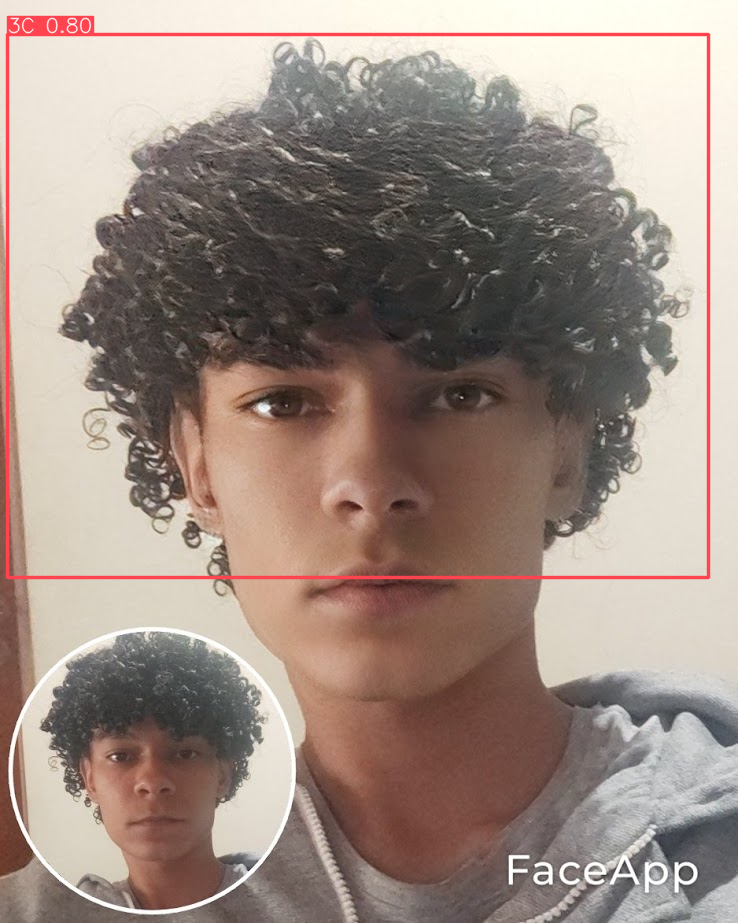

In [ ]:
results = model("eu2.jpg", imgsz=640) # conf=0.2, iou=0.4
results[0].show()

In [ ]:
response = ""

hair_types = {
    0: "1",
    1: "2A",
    2: "2B",
    3: "2C",
    4: "3A",
    5: "3B",
    6: "3C",
    7: "4A",
    8: "4B",
    9: "4C",
}

for r in results:
    boxes = r.boxes
    for box in boxes:
        class_id = int(box.cls)
        confidence = float(box.conf)

        hair_type = hair_types.get(class_id, "Desconhecido")
        response = hair_type
        print(f"Curvatura do cabelo: {hair_type} - Confiança: {confidence:.2f}")

print(response)


Curvatura do cabelo: 3C - Confiança: 0.80
3C



# Próximos passos para melhorar classificação
*   Data Augmentation
*   Métodos de Reamostragem
*   Seleção de Modelos e Regularização
*   Usar outro [dataset](https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset)?


In [ ]:
# Depois melhoramos isso

# Parte 2 - Fine Tuning no MT5



In [2]:
!pip install transformers
!pip install torch
!pip install datasets
!pip install pandas
!pip install simpletransformers

In [28]:
train_data = [
    {
        "context": "O cronograma capilar é uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução. O objetivo é restaurar a saúde dos fios, proporcionando força, brilho e maciez.",
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question": "O que é um cronograma capilar?",
                "answers": [
                    {
                        "text": "Uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução.",
                        "answer_start": 0,
                    }
                ],
            },
            {
                "id": "00002",
                "is_impossible": False,
                "question": "Qual o objetivo do cronograma capilar?",
                "answers": [
                    {
                        "text": "Restaurar a saúde dos fios, proporcionando força, brilho e maciez.",
                        "answer_start": 103,  # Ajuste na posição correta
                    }
                ],
            }
        ],
    },
    {
        "context": "A hidratação no cronograma capilar tem a função de repor a água dos fios, deixando-os mais macios e sedosos. Ingredientes como babosa, pantenol e glicerina são comuns em produtos hidratantes.",
        "qas": [
            {
                "id": "00003",
                "is_impossible": False,
                "question": "Qual a função da hidratação no cronograma capilar?",
                "answers": [
                    {
                        "text": "Repor a água dos fios, deixando-os mais macios e sedosos.",
                        "answer_start": 41,
                    }
                ],
            },
            {
                "id": "00004",
                "is_impossible": False,
                "question": "Quais ingredientes são comuns em produtos hidratantes?",
                "answers": [
                    {
                        "text": "Babosa, pantenol e glicerina.",
                        "answer_start": 129,  # Ajuste na posição correta
                    }
                ],
            }
        ],
    },
    {
        "context": "A nutrição capilar é responsável por devolver os lipídios ao cabelo, criando uma barreira protetora contra o ressecamento. Óleos vegetais e manteigas naturais são os principais ativos utilizados nessa etapa.",
        "qas": [
            {
                "id": "00005",
                "is_impossible": False,
                "question": "Qual a função da nutrição capilar?",
                "answers": [
                    {
                        "text": "Devolver os lipídios ao cabelo, criando uma barreira protetora contra o ressecamento.",
                        "answer_start": 28,
                    }
                ],
            },
            {
                "id": "00006",
                "is_impossible": False,
                "question": "Quais são os principais ativos usados na nutrição capilar?",
                "answers": [
                    {
                        "text": "Óleos vegetais e manteigas naturais.",
                        "answer_start": 133,  # Ajuste na posição correta
                    }
                ],
            },
        ],
    },
    {
        "context": "A reconstrução capilar fortalece os fios danificados, repondo proteínas essenciais, como a queratina. Esse tratamento é ideal para cabelos quebradiços e quimicamente tratados.",
        "qas": [
            {
                "id": "00007",
                "is_impossible": False,
                "question": "Qual a função da reconstrução capilar?",
                "answers": [
                    {
                        "text": "Fortalece os fios danificados, repondo proteínas essenciais, como a queratina.",
                        "answer_start": 23,
                    }
                ],
            },
            {
                "id": "00008",
                "is_impossible": False,
                "question": "Para quais tipos de cabelo a reconstrução é indicada?",
                "answers": [
                    {
                        "text": "Cabelos quebradiços e quimicamente tratados.",
                        "answer_start": 101,  # Ajuste na posição correta
                    }
                ],
            },
        ],
    },
]

test_data = [
    {
        "context": "O cronograma capilar é um tratamento personalizado para os cabelos, que equilibra hidratação, nutrição e reconstrução conforme a necessidade dos fios.",
        "qas": [
            {
                "id": "00009",
                "is_impossible": False,
                "question": "O que significa um cronograma capilar equilibrado?",
                "answers": [
                    {
                        "text": "Equilibra hidratação, nutrição e reconstrução conforme a necessidade dos fios.",
                        "answer_start": 56,
                    }
                ],
            },
        ],
    },
    {
        "context": "A reconstrução é a etapa mais intensa do cronograma capilar, pois repõe proteínas e aminoácidos para recuperar a estrutura do fio. A queratina líquida é um dos principais ativos utilizados nesse processo.",
        "qas": [
            {
                "id": "00010",
                "is_impossible": False,
                "question": "Por que a reconstrução é importante no cronograma capilar?",
                "answers": [
                    {
                        "text": "Repõe proteínas e aminoácidos para recuperar a estrutura do fio.",
                        "answer_start": 54,
                    }
                ],
            },
            {
                "id": "00011",
                "is_impossible": False,
                "question": "Qual o principal ativo da reconstrução capilar?",
                "answers": [
                    {
                        "text": "Queratina líquida.",
                        "answer_start": 142,
                    }
                ],
            },
        ],
    },
]

train_data = [
    {
        "context": "O cronograma capilar é uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução.",
        "qas": [
            {
                "id": "0001",
                "is_impossible": False,
                "question": "O que é o cronograma capilar?",
                "answers": [
                    {
                        "text": "cronograma capilar é uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução.",
                        "answer_start": 2
                    }
                ],
            }
        ],
    }
]

test_data = [
    {
        "context": "O cronograma capilar é uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução.",
        "qas": [
            {
                "id": "0002",
                "is_impossible": False,
                "question": "Quais são as etapas do cronograma capilar?",
                "answers": [
                    {
                        "text": "hidratação, nutrição e reconstrução.",
                        "answer_start": 67
                    }
                ],
            }
        ],
    }
]


print(f"Treino: {len(train_data)} exemplos")
print(f"Teste: {len(test_data)} exemplos")


Treino: 1 exemplos
Teste: 1 exemplos


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#output_dir = '/content/drive/MyDrive/bert_outputs'
output_dir = 'outputs/bert/best_model'

model_path = "outputs/bert"

In [35]:
from simpletransformers.question_answering import QuestionAnsweringModel

# Define transformer model arguments before training the BERT model

# Configurações de treinamento para o modelo QuestionAnswering
train_args = {
    "reprocess_input_data": True,  # Re-processa os dados de entrada durante o treinamento
    "overwrite_output_dir": True,  # Sobrescreve o diretório de saída se já existir
    "use_cached_eval_features": True,  # Usa características de avaliação em cache se disponíveis
    "output_dir": f"outputs/bert",  # Diretório de saída para salvar os resultados do treinamento
    "best_model_dir": f"{output_dir}/bert/best_model",  # Diretório para salvar o melhor modelo treinado
    "evaluate_during_training": True,  # Avalia o desempenho durante o treinamento
    "max_seq_length": 128,  # Comprimento máximo da sequência de entrada
    "num_train_epochs": 3,  # Número total de épocas de treinamento
    "evaluate_during_training_steps": 1000,  # Avalia o desempenho a cada 1000 passos durante o treinamento
    "save_model_every_epoch": False,  # Não salva o modelo a cada época
    "save_eval_checkpoints": False,  # Não salva checkpoints de avaliação
    "n_best_size": 8,  # Número de melhores respostas a serem consideradas
    "train_batch_size": 16,  # Tamanho do lote de treinamento
    "eval_batch_size": 16  # Tamanho do lote de avaliação
}

#model_checkpoint = "neuralmind/bert-base-portuguese-cased"

#model = QuestionAnsweringModel( "bert","bert-base-uncased", args=train_args, use_cuda=True)
model = QuestionAnsweringModel(
    "bert",
    "neuralmind/bert-base-portuguese-cased",
    args=train_args,
    use_cuda=False
)

# # Treinando o modelo
model.train_model(train_data, eval_data=test_data)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 9177.91it/s]


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/question_answering/question_answering_model.py:302: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

(3,
 {'global_step': [1, 2, 3],
  'correct': [0, 0, 0],
  'similar': [0, 0, 1],
  'incorrect': [1, 1, 0],
  'train_loss': [4.6508073806762695, 4.666687965393066, 3.900430202484131],
  'eval_loss': [-0.014911661855876446,
   -0.07367777824401855,
   -0.10456883162260056]})

In [27]:
from simpletransformers.question_answering import QuestionAnsweringModel

# Carregar o modelo treinado
model_path = "outputs/bert/best_model"
model = QuestionAnsweringModel("bert", model_path, use_cuda=False)

# Definir perguntas de teste baseadas no dataset
to_predict = [
    {
        "context": "O cronograma capilar é uma rotina de cuidados com os cabelos que intercala hidratação, nutrição e reconstrução.",
        "qas": [
            {
                "question": "O que é o cronograma capilar?",
                "id": "0",
            },
        ]
    },
    {
        "context": "A hidratação tem a função de repor a água dos fios, deixando-os mais macios e sedosos.",
        "qas": [
            {
                "question": "Qual a função da hidratação no cabelo?",
                "id": "1",
            },
        ]
    }
]

# Fazer predições
answers, probabilities = model.predict(to_predict, n_best_size=None)

# Exibir respostas
for i, answer in enumerate(answers):
    print(f"Pergunta {i+1}: {to_predict[i]['qas'][0]['question']}")
    print(f"Resposta: {answer['answer'][0]}")
    print("-" * 50)


OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory outputs/bert/best_model.

In [ ]:
# Load model from training checkpoint

model = QuestionAnsweringModel("bert", "/content/drive/MyDrive/bert_outputs/bert/best_model",use_cuda=False)


# Realizando predições em novas perguntas
to_predict = [
       {
        "context": "Common first aid techniques include CPR (cardiopulmonary resuscitation), treating burns, stopping bleeding, and providing support to someone who is choking.",
        "qas": [
            {
                "question": "What is the purpose of CPR?",
                "id": "0",
            },
        ]
     }
]

answers, probabilities = model.predict(to_predict, n_best_size=None)
print(answers)

In [ ]:
import json

import random

# Dataset original
dataset = [
    {"curvatura": "2A", "problema": "Fios oleosos e sem volume", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com chá-verde e babosa.\n- Quarta: Nutrição leve com óleo de argan.\n- Sexta: Reconstrução com proteína do trigo.\n\nEvite cremes pesados e opte por finalizadores leves para manter o volume."},

    {"curvatura": "2A", "problema": "Fios finos e frágeis", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com água de coco.\n- Quarta: Nutrição com óleo de macadâmia.\n- Sexta: Reconstrução com queratina líquida.\n\nEvite excesso de calor e aposte em produtos leves."},

    {"curvatura": "2B", "problema": "Frizz e pouca definição", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Terça: Hidratação com babosa e pantenol.\n- Quinta: Nutrição com óleo de coco.\n- Sábado: Reconstrução com queratina vegetal.\n\nFinalize com difusor em baixa temperatura para maior definição."},

    {"curvatura": "2B", "problema": "Fios armados e secos", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com chá de camomila e mel.\n- Quarta: Nutrição com manteiga de karité.\n- Sexta: Reconstrução com colágeno vegetal.\n\nUse pentes de madeira para reduzir o frizz."},

    {"curvatura": "3A", "problema": "Ressecamento e frizz", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com babosa.\n- Quarta: Nutrição com óleo de coco.\n- Sexta: Reconstrução com colágeno vegetal.\n\nFinalize com creme ativador de cachos e evite calor excessivo."},

    {"curvatura": "3A", "problema": "Cabelos sem brilho", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com vinagre de maçã e babosa.\n- Quarta: Nutrição com óleo de oliva.\n- Sexta: Reconstrução com proteínas vegetais.\n\nEnxágue final com água fria para mais brilho."},

    {"curvatura": "3B", "problema": "Falta de definição e ressecamento", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com extrato de aveia.\n- Quarta: Nutrição com manteiga de karité.\n- Sexta: Reconstrução com aminoácidos.\n\nAposte em técnicas como fitagem para definição dos cachos."},

    {"curvatura": "3B", "problema": "Fios opacos", "frequencia": "3 vezes por semana",
     "cronograma": "Semana 1:\n- Terça: Hidratação com chá-verde e mel.\n- Quinta: Nutrição com óleo de abacate.\n- Sábado: Reconstrução com proteínas do arroz.\n\nEvite lavar os fios com água muito quente."},

    {"curvatura": "3C", "problema": "Cabelos quebradiços e porosos", "frequencia": "2 vezes por semana",
     "cronograma": "Semana 1:\n- Terça: Hidratação com glicerina e aloe vera.\n- Sexta: Nutrição com óleo de rícino.\n- Domingo: Reconstrução com colágeno vegetal.\n\nEvite penteados muito apertados para reduzir a quebra."},

    {"curvatura": "4A", "problema": "Ressecamento e pouca maleabilidade", "frequencia": "2 vezes por semana",
     "cronograma": "Semana 1:\n- Segunda: Hidratação com leite de coco e babosa.\n- Quinta: Nutrição com óleo de abacate.\n- Sábado: Reconstrução com proteínas vegetais.\n\nMantenha a umectação noturna para prolongar a hidratação."},

    {"curvatura": "4B", "problema": "Fios muito secos e sem brilho", "frequencia": "2 vezes por semana",
     "cronograma": "Semana 1:\n- Terça: Hidratação com glicerina e pantenol.\n- Sexta: Nutrição intensa com manteiga de cupuaçu.\n- Domingo: Reconstrução com queratina líquida.\n\nAposte em finalizadores mais densos para manter a hidratação por mais tempo."},

    {"curvatura": "4C", "problema": "Quebra e pouco brilho", "frequencia": "2 vezes por semana",
     "cronograma": "Semana 1:\n- Terça: Hidratação com manteiga de murumuru.\n- Quinta: Nutrição intensa com óleo de pracaxi.\n- Sábado: Reconstrução com queratina líquida.\n\nUtilize um creme de pentear denso para manter a hidratação e definir os fios."}
]

# Listas de ingredientes e dias alternativos para variação (Alterar para um script para pegar produtos reais pela internet)
hidratação_ingredientes = ["chá-verde", "babosa", "água de coco", "camomila", "glicerina", "aloe vera", "leite de coco", "azeite de oliva"]
nutricao_ingredientes = ["óleo de argan", "óleo de oliva", "óleo de macadâmia", "óleo de jojoba", "manteiga de karité", "manteiga de cupuaçu", "óleo de abacate"]
reconstrucao_ingredientes = ["queratina líquida", "proteínas vegetais", "proteína do trigo", "colágeno vegetal", "proteínas do arroz", "queratina vegetal"]

dias_semana = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]

# Função para criar variações do cronograma
def gerar_variacoes(dados, n=20):
    nova_lista = []
    for _ in range(n):
        for item in dados:
            curvatura = item["curvatura"]
            problema = item["problema"]
            frequencia = item["frequencia"]

            # Criar variações no cronograma
            dias = random.sample(dias_semana, 3)  # 3 dias aleatórios
            hidratacao = random.choice(hidratação_ingredientes)
            nutricao = random.choice(nutricao_ingredientes)
            reconstrucao = random.choice(reconstrucao_ingredientes)

            cronograma = f"Semana 1:\n- {dias[0]}: Hidratação com {hidratacao}.\n- {dias[1]}: Nutrição com {nutricao}.\n- {dias[2]}: Reconstrução com {reconstrucao}.\n\n"
            cronograma += "Evite cremes pesados e opte por finalizadores leves para manter o volume." if "oleosos" in problema else "Aposte em finalizadores densos para hidratação prolongada."

            nova_lista.append({"curvatura": curvatura, "problema": problema, "frequencia": frequencia, "cronograma": cronograma})

    return nova_lista

# Gerar mais dados
dataset_expanded = gerar_variacoes(dataset, n=20)

# Exibir as 5 primeiras entradas para verificar
for entry in dataset_expanded[:5]:
    print(entry)

dataset = [{"prompt": f"Curvatura: {c['curvatura']}. Problema: {c['problema']}. Frequência de lavagem: {c['frequencia']}.",
            "resposta": c["cronograma"]} for c in dataset_expanded]

with open("cronograma_capilar.json", "w", encoding="utf-8") as f:
    json.dump(dataset, f, indent=4, ensure_ascii=False)

print("✅ Dataset salvo como cronograma_capilar.json")

{'curvatura': '2A', 'problema': 'Fios oleosos e sem volume', 'frequencia': '3 vezes por semana', 'cronograma': 'Semana 1:\n- Segunda: Hidratação com babosa.\n- Sexta: Nutrição com óleo de abacate.\n- Terça: Reconstrução com colágeno vegetal.\n\nEvite cremes pesados e opte por finalizadores leves para manter o volume.'}
{'curvatura': '2A', 'problema': 'Fios finos e frágeis', 'frequencia': '3 vezes por semana', 'cronograma': 'Semana 1:\n- Segunda: Hidratação com chá-verde.\n- Domingo: Nutrição com manteiga de cupuaçu.\n- Sábado: Reconstrução com queratina vegetal.\n\nAposte em finalizadores densos para hidratação prolongada.'}
{'curvatura': '2B', 'problema': 'Frizz e pouca definição', 'frequencia': '3 vezes por semana', 'cronograma': 'Semana 1:\n- Quarta: Hidratação com água de coco.\n- Sexta: Nutrição com óleo de jojoba.\n- Segunda: Reconstrução com proteínas do arroz.\n\nAposte em finalizadores densos para hidratação prolongada.'}
{'curvatura': '2B', 'problema': 'Fios armados e secos',

# Tokenizando
=> Processo de dividir um texto em partes menores (tokens).

- Entrada: "Eu gosto de programação."

- Tokenização por palavras: ["Eu", "gosto", "de", "programação", "."]

- Tokenização subpalavra (BPE, WordPiece, SentencePiece): ["Eu", "gost", "o", "de", "programa", "ção", "."]

Diferentes modelos usam diferentes métodos de tokenização:

*   BERT → Usa WordPiece (tokens baseados em frequência)
*   GPT → Usa Byte Pair Encoding (BPE)
*   T5/mT5 → Usa SentencePiece


In [ ]:
# https://huggingface.co/unicamp-dl/ptt5-base-portuguese-vocab
from transformers import AutoTokenizer, AutoModelWithLMHead
# Carregar modelo e tokenizer
tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/ptt5-base-portuguese-vocab")
model = AutoModelWithLMHead.from_pretrained("unicamp-dl/ptt5-base-portuguese-vocab")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/pytho

In [ ]:
from datasets import load_dataset

# Carregar dataset JSON
dataset = load_dataset("json", data_files="cronograma_capilar.json")

# Tokenização
# def tokenize_function(example):
#     return tokenizer(example["prompt"], text_target=example["resposta"], padding="max_length", truncation=True)
# def tokenize_function(example):
#     inputs = tokenizer(example["prompt"], padding="max_length", truncation=True)
#     targets = tokenizer(example["resposta"], padding="max_length", truncation=True)

#     # O modelo precisa saber que "targets" é o rótulo da resposta esperada
#     inputs["labels"] = targets["input_ids"]

#     return inputs
def tokenize_function(example):
    inputs = tokenizer(example["prompt"], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(example["resposta"], padding="max_length", truncation=True, max_length=128)

    inputs["labels"] = targets["input_ids"]

    return inputs

# Aplicar tokenização
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Separar dataset em treino e teste (80% treino, 20% teste)
train_test_split = tokenized_datasets["train"].train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
eval_dataset = train_test_split["test"]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

In [ ]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# Configurar parâmetros de treinamento
training_args = Seq2SeqTrainingArguments(
    output_dir="./mt5-cronograma-capilar",  # Pasta para salvar modelo
    evaluation_strategy="epoch",  # Avaliação por época
    save_strategy="epoch",  # Salvar modelo a cada época
    per_device_train_batch_size=16,  # Tamanho do batch no treino
    per_device_eval_batch_size=16,  # Tamanho do batch na avaliação
    learning_rate=3e-5,  # Taxa de aprendizado
    weight_decay=0.01,  # Decaimento do peso
    save_total_limit=3,  # Limite de checkpoints salvos
    num_train_epochs=30,  # Número de épocas
    predict_with_generate=True,  # Gerar previsões
    logging_dir="./logs",  # Diretório para logs
    logging_steps=200,  # Frequência dos logs
    push_to_hub=False  # Não subir para o Hugging Face Hub
)

# Criar o Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-5-f3a47bdcb38e>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: felippevm (felippevm-universidade-federal-de-minas-gerais) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


In [ ]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 10.529279708862305, 'eval_runtime': 10.0504, 'eval_samples_per_second': 0.199, 'eval_steps_per_second': 0.099, 'epoch': 15.0}


In [ ]:
# Salvar modelo ajustado
model.save_pretrained("./mt5-cronograma-capilar-finetuned")
tokenizer.save_pretrained("./mt5-cronograma-capilar-finetuned")

('./mt5-cronograma-capilar-finetuned/tokenizer_config.json',
 './mt5-cronograma-capilar-finetuned/special_tokens_map.json',
 './mt5-cronograma-capilar-finetuned/spiece.model',
 './mt5-cronograma-capilar-finetuned/added_tokens.json',
 './mt5-cronograma-capilar-finetuned/tokenizer.json')

In [ ]:
# Criar uma entrada de teste
prompt = "Meu cabelo é 3B e está ressecado. Qual cronograma capilar você recomenda?"

# Tokenizar entrada
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Gerar resposta com ajustes
output_ids = model.generate(
    input_ids,
    max_length=150,  # Aumentar o tamanho da resposta
    num_return_sequences=1,  # Apenas uma resposta gerada
    temperature=0.8,  # Controla a criatividade (1.0 é mais aleatório)
    top_p=0.9,  # Nucleus sampling para diversidade
    do_sample=True  # Permite variação na resposta
)

# Decodificar resposta
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(output_text)

Meu cabelo é 3B e está ressecado. Qual cronograma capilar você recomenda?


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Carregar dataset
dataset = load_dataset("json", data_files="cronograma_capilar.json")

# Tokenizer do modelo
model_checkpoint = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Tokenizar
def tokenize_function(example):
    return tokenizer(example["prompt"], text_target=example["resposta"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Criar um diretório para salvar
save_directory = "./modelo_cronograma"

# Salvar modelo treinado
model.save_pretrained(save_directory)

# Salvar tokenizer
tokenizer.save_pretrained(save_directory)

print(f"✅ Modelo salvo em {save_directory}")

✅ Modelo salvo em ./modelo_cronograma
